In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 43s 56ms/step - loss: 0.2078 - accuracy: 0.9376 - val_loss: 0.0600 - val_accuracy: 0.9828
Epoch 2/5
750/750 [==============================] - 41s 54ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0500 - val_accuracy: 0.9850
Epoch 3/5
750/750 [==============================] - 41s 54ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0456 - val_accuracy: 0.9865
Epoch 4/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0431 - val_accuracy: 0.9877
Epoch 5/5
750/750 [==============================] - 39s 51ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0390 - val_accuracy: 0.9884


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0273 - accuracy: 0.9906
Test accuracy: 0.9905999898910522
Test loss: 0.027271118015050888


In [ ]:
# Function to train the model
def train_model(model, train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2):
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return history

In [ ]:
def train_model(model, train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2):
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return history

# Function to plot training history (accuracy and loss over epochs)
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
# Function to plot training history (accuracy and loss over epochs)
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
# Train the model and store the training history
history = train_model(model, train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0444 - val_accuracy: 0.9883
Epoch 2/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0341 - val_accuracy: 0.9905
Epoch 3/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0131 - accuracy: 0.9953 - val_loss: 0.0476 - val_accuracy: 0.9882
Epoch 4/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0427 - val_accuracy: 0.9892
Epoch 5/5
750/750 [==============================] - 41s 54ms/step - loss: 0.0099 - accuracy: 0.9964 - val_loss: 0.0518 - val_accuracy: 0.9877


313/313 [==============================] - 4s 13ms/step - loss: 0.0385 - accuracy: 0.9900
Test accuracy: 0.9900000095367432
Test loss: 0.038453359156847
313/313 [==============================] - 2s 8ms/step
Predicted: 7, Actual: 7


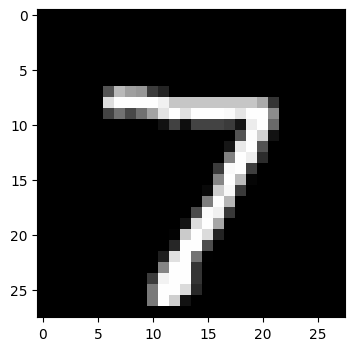

Predicted: 2, Actual: 2


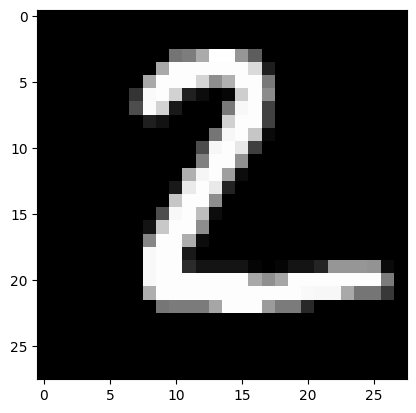

Predicted: 1, Actual: 1


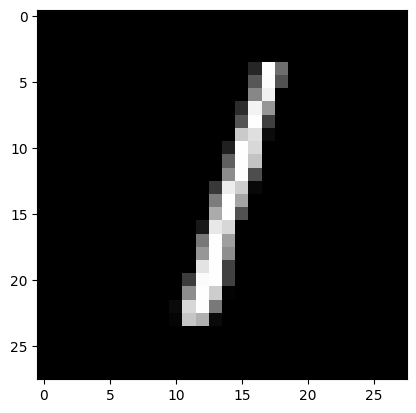

Predicted: 0, Actual: 0


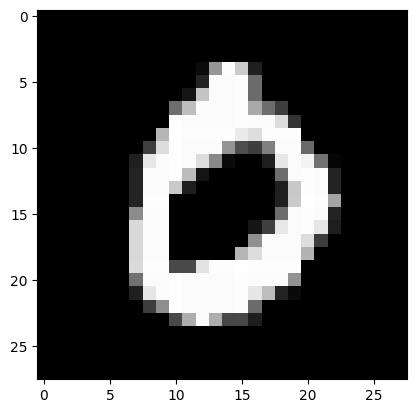

Predicted: 4, Actual: 4


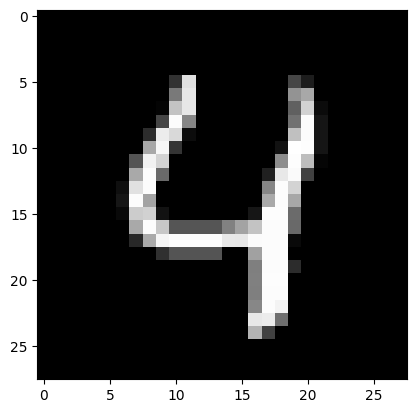

In [ ]:
import numpy as np


# Function to evaluate the model on the test set
def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Test accuracy: {test_acc}')
    print(f'Test loss: {test_loss}')

def display_predictions(model, test_images, test_labels, num_predictions=5):
    predictions = model.predict(test_images)
    for i in range(num_predictions):
        print(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(test_labels[i])}")
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
        plt.show()


def train_model(model, train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2):
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return history

# Function to plot training history (accuracy and loss over epochs)
def plot_training_history(history):
    plt.figure(figsize=(12, 4))


plot_training_history(history)
evaluate_model(model, test_images, test_labels)
display_predictions(model, test_images, test_labels, num_predictions=5)
